In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Ankita\Downloads\machine.csv')
data.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [2]:
data.tail()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47
207,wang,vs-90,480,1000,4000,0,0,0,45,25


In [3]:
data.columns=['vendor_name', 'model_name', 'machine_cycle_time_ns', 'mmin', 'mmax', 'cache', 'chmin', 'chmax', 'prp', 'erp']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
vendor_name              208 non-null object
model_name               208 non-null object
machine_cycle_time_ns    208 non-null int64
mmin                     208 non-null int64
mmax                     208 non-null int64
cache                    208 non-null int64
chmin                    208 non-null int64
chmax                    208 non-null int64
prp                      208 non-null int64
erp                      208 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.3+ KB


In [4]:
data.describe()

,machine_cycle_time_ns,mmin,mmax,cache,chmin,chmax,prp,erp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [5]:
data.drop(['vendor_name','model_name'],axis=1, inplace=True)
data.head()

,machine_cycle_time_ns,mmin,mmax,cache,chmin,chmax,prp,erp
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


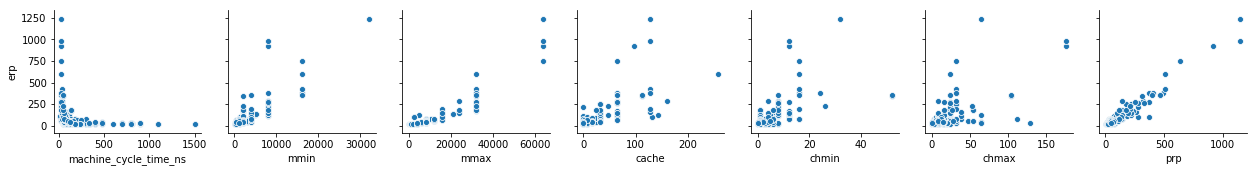

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
x= data.drop(['erp'], axis=1)
sns.pairplot(data, x_vars=x.columns, y_vars=['erp'])
plt.show()

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
scaled= pd.DataFrame(scaler.transform(data))

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
scaled.head()

,0,1,2,3,4,5,6,7
0,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,1.019412,0.997070
1,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.714501,0.997070
2,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.415812,0.997070
3,-0.673322,1.321325,0.356323,0.211741,0.495619,-0.070026,0.166905,0.214415
4,-0.684851,1.321325,1.721553,1.069007,0.495619,0.573749,1.324323,1.236395


In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
ols = linear_model.LinearRegression()
train, test = train_test_split(scaled)
#model = ols.fit(x_train, y_train)
train.head()

,0,1,2,3,4,5,6,7
185,-0.584930,0.288931,0.356323,0.211741,-0.095148,-0.230970,0.154460,0.000964
110,2.674035,-0.227266,-0.667599,-0.645526,-0.242839,-0.472385,-0.424249,-0.458280
161,-0.569558,0.288931,-0.326291,-0.645526,-0.538223,-0.391913,-0.442917,-0.335384
120,-0.719439,0.288931,0.356323,0.211741,0.200236,-0.230970,0.173128,0.110924
14,-0.016148,-0.611316,0.356323,-0.645526,-0.095148,0.573749,-0.436694,-0.225424


In [19]:
model= ols.fit(train.iloc[:,0:7], train.iloc[:,7])
pred=model.predict(test.iloc[:,0:7])
pred_train = model.predict(train.iloc[:,0:7])
test_y = test[7]

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE on test: ", mean_absolute_error(test_y, pred))
print("R2 score on test: ", r2_score(test_y, pred))

MAE on test:  0.11494957308257046
R2 score on test:  0.9719395274396672


In [23]:
print("MAE on train: ", mean_absolute_error(train.iloc[:,7], pred_train))
print("R2 score on train: ", r2_score(train.iloc[:,7], pred_train))

MAE on train:  0.13915839072109557
R2 score on train:  0.9517916766342741


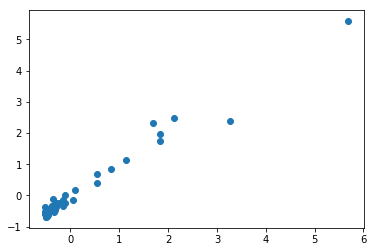

In [43]:
plt.scatter(test_y, pred)